In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [40]:
cd

C:\Users\alima


In [41]:
df = pd.read_csv('./OneDrive/Documents/APZIVA/Project _2/term-deposit-marketing-2020.csv')

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [43]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


## Data Description

Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

Attributes:

age : age of customer (numeric)
job : type of job (categorical)
marital : marital status (categorical)
education (categorical)
default: has credit in default? (binary)
balance: average yearly balance, in euros (numeric)
housing: has a housing loan? (binary)
loan: has personal loan? (binary)
contact: contact communication type (categorical)
day: last contact day of the month (numeric)
month: last contact month of year (categorical)
duration: last contact duration, in seconds (numeric)
campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
Output (desired target):

y - has the client subscribed to a term deposit? (binary)
Download Data:

Goal(s):

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)
Success Metric(s):

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.
Bonus(es):

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.
What makes the customers buy? Tell us which feature we should be focusing more on.

## Exploratory Data Analysis

In [44]:
df.shape

(40000, 14)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [46]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [47]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,y
count,40000,40000,40000,40000,40000,40000,40000,40000,40000
unique,12,3,4,2,2,2,3,11,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,no
freq,9383,24386,20993,39191,24031,33070,24914,13532,37104


In [48]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

## Exploring and engineering the categorical features of the data frame

In [49]:
df['job'].value_counts()

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

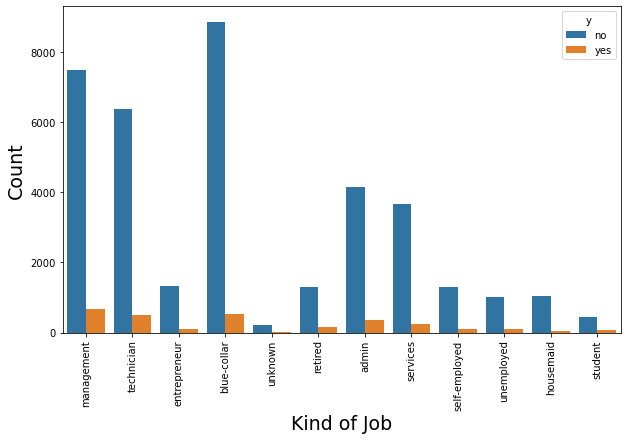

In [50]:
f, ax = plt.subplots(figsize=(10,6))
job = sns.countplot(x = 'job', hue = "y", data = df)
job.set_xlabel('Kind of Job', size = 19)
job.set_ylabel('Count', size = 19)
plt.xticks(rotation =90);

In [51]:
#The percentage of unknown job titles!

unknownJob_percentage = 100 * ((df['job'] == 'unknown').sum()) / df['job'].value_counts().sum()
unknownJob_percentage

0.5875

In [52]:
# Encoding the job feature

encoded_jobs = pd.get_dummies(df['job'], prefix='job')
df = df.drop('job', axis=1)
df = pd.concat([df, encoded_jobs], axis=1)


In [53]:
df['marital'].value_counts()

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

Text(0, 0.5, 'Count')

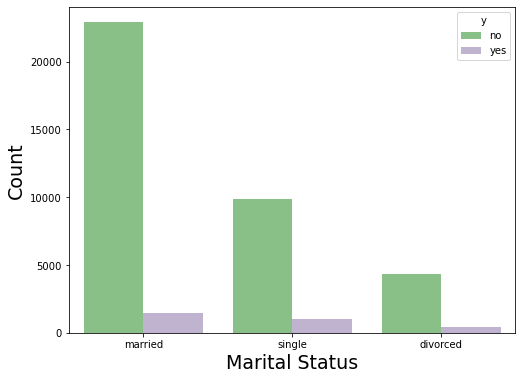

In [54]:
f, ax = plt.subplots(figsize=(8,6))
marital = sns.countplot(x = 'marital', hue = "y", palette=sns.color_palette("Accent"), data = df)
marital.set_xlabel('Marital Status', size = 19)
marital.set_ylabel('Count', size = 19)

In [55]:
encoded_marital = pd.get_dummies(df['marital'], prefix='marital')
df = df.drop('marital', axis=1)
df = pd.concat([df, encoded_marital], axis=1)

In [56]:
df['education'].value_counts()

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

#### The unknown answer for education level is only 4% of the total number of rows!

In [57]:
unknownEducation_percentage = 100 * ((df['education'] == 'unknown').sum()) / df['education'].value_counts().sum()
unknownEducation_percentage

3.8275

Text(0, 0.5, 'Count')

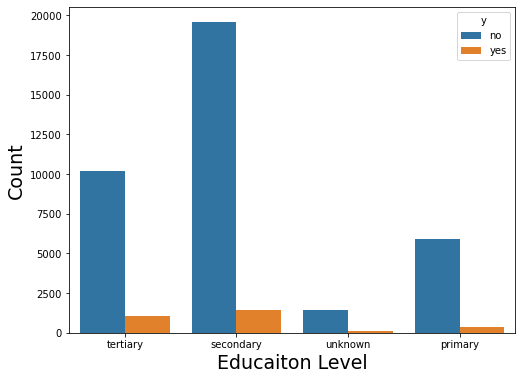

In [58]:
f, ax = plt.subplots(figsize=(8,6))
education = sns.countplot(x = 'education', hue = "y", palette=sns.color_palette("tab10"), data = df)
education.set_xlabel('Educaiton Level', size = 19)
education.set_ylabel('Count', size = 19)

In [59]:
encoded_education = pd.get_dummies(df['education'], prefix='education')
df = df.drop('education', axis=1)
df = pd.concat([df, encoded_education], axis=1)

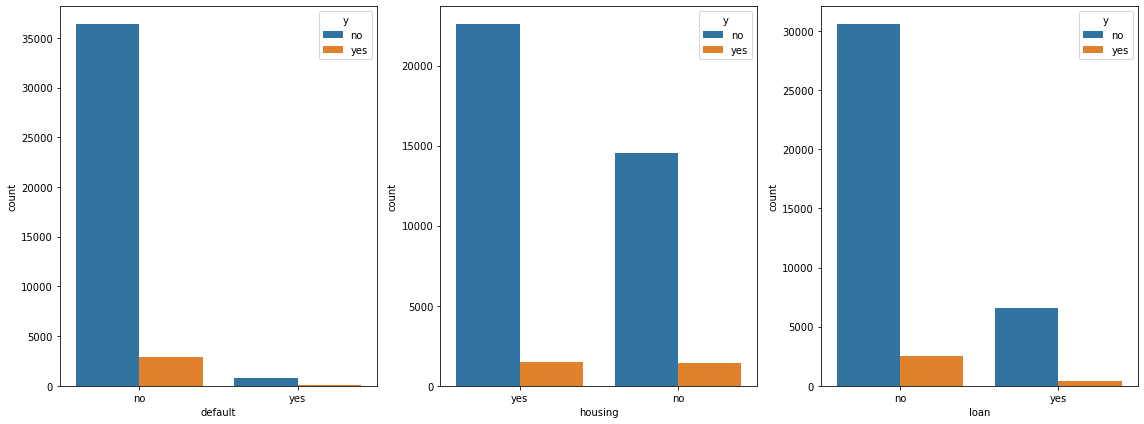

In [60]:
f, ax = plt.subplots(1,3, figsize=(16,6))
default = sns.countplot(x = 'default', hue = 'y', ax = ax[0], data =df)
housing = sns.countplot(x = 'housing', hue = 'y', ax = ax [1], data = df)
loan = sns.countplot(x = 'loan', hue = 'y', ax = ax [2], data = df)
plt.tight_layout()

In [61]:
df['default'].value_counts()

no     39191
yes      809
Name: default, dtype: int64

In [62]:
df['default'] = df['default'].map(lambda x:1 if x == 'yes' else 0)
df['housing'] = df['housing'].map(lambda x:1 if x == 'yes' else 0)
df['loan'] = df['loan'].map(lambda x:1 if x == 'no' else 0)
df

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,1,unknown,5,may,261,1,...,0,0,0,0,1,0,0,0,1,0
1,44,0,29,1,1,unknown,5,may,151,1,...,1,0,0,0,0,1,0,1,0,0
2,33,0,2,1,0,unknown,5,may,76,1,...,0,0,0,0,1,0,0,1,0,0
3,47,0,1506,1,1,unknown,5,may,92,1,...,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,1,unknown,5,may,198,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,0,395,0,1,cellular,3,jun,107,1,...,1,0,0,0,1,0,0,0,1,0
39996,30,0,3340,0,1,cellular,3,jun,238,3,...,0,0,0,0,0,1,0,0,1,0
39997,54,0,200,0,1,cellular,3,jun,170,1,...,0,0,0,1,0,0,0,1,0,0
39998,34,0,1047,0,1,cellular,3,jun,342,1,...,0,0,0,0,1,0,0,0,1,0


Text(0, 0.5, 'Count')

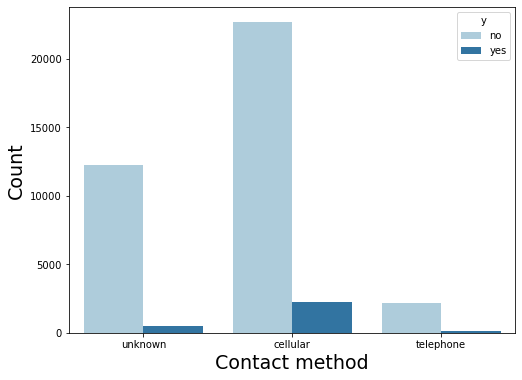

In [63]:
f, ax = plt.subplots(figsize=(8,6))
education = sns.countplot(x = 'contact', hue = "y", palette=sns.color_palette("Paired"), data = df)
education.set_xlabel('Contact method', size = 19)
education.set_ylabel('Count', size = 19)

In [64]:
encoded_contact = pd.get_dummies(df['contact'], prefix='contact')
df = df.drop('contact', axis=1)
df = pd.concat([df, encoded_contact], axis=1)

Text(0, 0.5, 'Count')

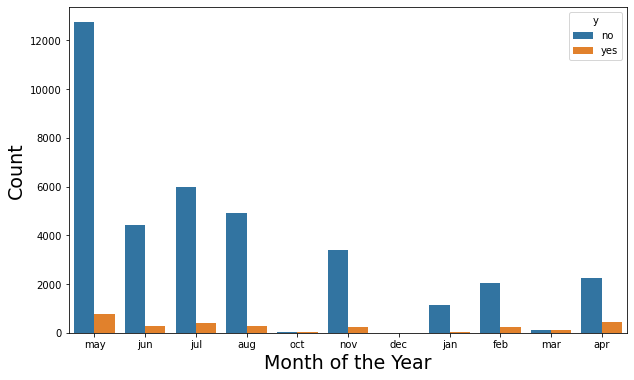

In [65]:
f, ax = plt.subplots(figsize=(10,6))
education = sns.countplot(x = 'month', hue = "y", palette=sns.color_palette("tab10"), data = df)
education.set_xlabel('Month of the Year', size = 19)
education.set_ylabel('Count', size = 19)

In [66]:
df['month'].value_counts()

may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: month, dtype: int64

In [67]:
replace_map = {'month': {'apr': 'firstHalf', 'may':'firstHalf', 'jun':'firstHalf', 
                       'jul':'firstHalf', 'aug':'firstHalf', 'oct':'secondHalf',
                      'nov':'secondHalf', 'dec':'secondHalf', 'jan':'secondHalf',
                      'feb':'secondHalf', 'mar':'secondHalf'}
              }

In [68]:
df = df.replace(replace_map)

In [69]:
encoded_month = pd.get_dummies(df['month'], prefix='month')
df = df.drop('month', axis=1)
df = pd.concat([df, encoded_month], axis=1)

In [70]:
df

,age,default,balance,housing,loan,day,duration,campaign,y,job_admin,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_firstHalf,month_secondHalf
0,58,0,2143,1,1,5,261,1,no,0,...,0,0,0,1,0,0,0,1,1,0
1,44,0,29,1,1,5,151,1,no,0,...,1,0,1,0,0,0,0,1,1,0
2,33,0,2,1,0,5,76,1,no,0,...,0,0,1,0,0,0,0,1,1,0
3,47,0,1506,1,1,5,92,1,no,0,...,0,0,0,0,1,0,0,1,1,0
4,33,0,1,0,1,5,198,1,no,0,...,1,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,0,395,0,1,3,107,1,no,0,...,0,0,0,1,0,1,0,0,1,0
39996,30,0,3340,0,1,3,238,3,yes,0,...,1,0,0,1,0,1,0,0,1,0
39997,54,0,200,0,1,3,170,1,yes,1,...,0,0,1,0,0,1,0,0,1,0
39998,34,0,1047,0,1,3,342,1,no,0,...,0,0,0,1,0,1,0,0,1,0


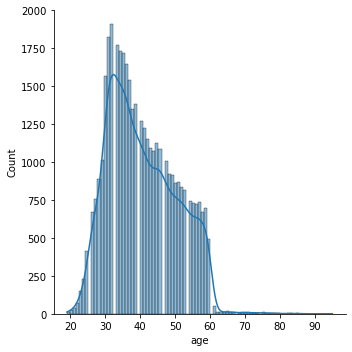

In [71]:

sns.displot(data=df, x='age', kde=True)


In [72]:
# from sklearn.preprocessing import KBinsDiscretizer

# kbd = KBinsDiscretizer(n_bins=10, encode='ordinal')
# df['binned_age'] = kbd.fit_transform(df['age'].values.reshape(-1, 1)).astype('int')

In [73]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

labels = [15, 25, 35, 45, 55, 65, 75, 85, 95]

df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels)
df['age_range'] = pd.to_numeric(df['age_range'])
df =df.drop('age', axis=1)

In [74]:
df['y'] = df['y'].apply(lambda x:1 if x=='yes' else 0)

In [75]:
df

,default,balance,housing,loan,day,duration,campaign,y,job_admin,job_blue-collar,...,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_firstHalf,month_secondHalf,age_range
0,0,2143,1,1,5,261,1,0,0,0,...,0,0,1,0,0,0,1,1,0,55
1,0,29,1,1,5,151,1,0,0,0,...,0,1,0,0,0,0,1,1,0,45
2,0,2,1,0,5,76,1,0,0,0,...,0,1,0,0,0,0,1,1,0,35
3,0,1506,1,1,5,92,1,0,0,1,...,0,0,0,1,0,0,1,1,0,45
4,0,1,0,1,5,198,1,0,0,0,...,0,0,0,1,0,0,1,1,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,395,0,1,3,107,1,0,0,0,...,0,0,1,0,1,0,0,1,0,55
39996,0,3340,0,1,3,238,3,1,0,0,...,0,0,1,0,1,0,0,1,0,25
39997,0,200,0,1,3,170,1,1,1,0,...,0,1,0,0,1,0,0,1,0,55
39998,0,1047,0,1,3,342,1,0,0,0,...,0,0,1,0,1,0,0,1,0,35


In [76]:
correlation = df.corr()
correlation

,default,balance,housing,loan,day,duration,campaign,y,job_admin,job_blue-collar,...,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_firstHalf,month_secondHalf,age_range
default,1.000000,-0.070069,-0.019229,-0.075006,0.006287,-0.008597,0.012135,-0.006559,-0.009384,0.004706,...,-0.000885,0.011528,-0.012513,0.000959,-0.002889,-0.015149,0.010602,0.006894,-0.006894,-0.014127
balance,-0.070069,1.000000,-0.049946,0.080596,0.011662,0.014072,-0.008137,0.030232,-0.024774,-0.041461,...,-0.020949,-0.063920,0.083069,0.011639,0.004086,0.029116,-0.018851,-0.092019,0.092019,0.078196
housing,-0.019229,-0.049946,1.000000,-0.004266,-0.050622,0.022455,-0.054823,-0.054336,0.039440,0.156122,...,0.011533,0.093628,-0.098019,-0.036128,-0.141946,-0.059696,0.177530,0.088951,-0.088951,-0.167326
loan,-0.075006,0.080596,-0.004266,1.000000,-0.005838,0.003952,-0.000582,0.031029,-0.025195,-0.005674,...,0.012951,-0.065472,0.041987,0.047598,-0.029800,0.001727,0.030119,0.003112,-0.003112,0.001987
day,0.006287,0.011662,-0.050622,-0.005838,1.000000,-0.032983,0.165429,-0.006420,-0.008858,-0.035006,...,-0.029240,-0.010139,0.033773,0.002749,0.034320,0.037242,-0.054363,-0.013077,0.013077,-0.006290
duration,-0.008597,0.014072,0.022455,0.003952,-0.032983,1.000000,-0.088387,0.461169,-0.008152,0.015951,...,-0.007313,0.006765,-0.000303,-0.003043,0.017624,-0.040379,0.001928,0.008414,-0.008414,-0.038451
campaign,0.012135,-0.008137,-0.054823,-0.000582,0.165429,-0.088387,1.000000,-0.040350,-0.020156,-0.004635,...,0.004326,-0.027133,0.022487,0.009791,-0.017733,0.061620,-0.012468,0.122324,-0.122324,0.017497
y,-0.006559,0.030232,-0.054336,0.031029,-0.006420,0.461169,-0.040350,1.000000,0.008083,-0.032859,...,-0.026786,-0.019683,0.046763,-0.007464,0.085433,-0.000842,-0.088408,-0.037404,0.037404,-0.021331
job_admin,-0.009384,-0.024774,0.039440,-0.025195,-0.008858,-0.008152,-0.020156,0.008083,1.000000,-0.196678,...,-0.109145,0.217446,-0.149282,-0.009743,-0.009522,-0.001399,0.010602,-0.003117,0.003117,-0.047703
job_blue-collar,0.004706,-0.041461,0.156122,-0.005674,-0.035006,0.015951,-0.004635,-0.032859,-0.196678,1.000000,...,0.357376,0.025941,-0.328668,0.024560,-0.115425,0.006448,0.116781,0.088757,-0.088757,-0.026442


C:\Users\alima\AppData\Local\Temp\ipykernel_17180\916200598.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<AxesSubplot:>

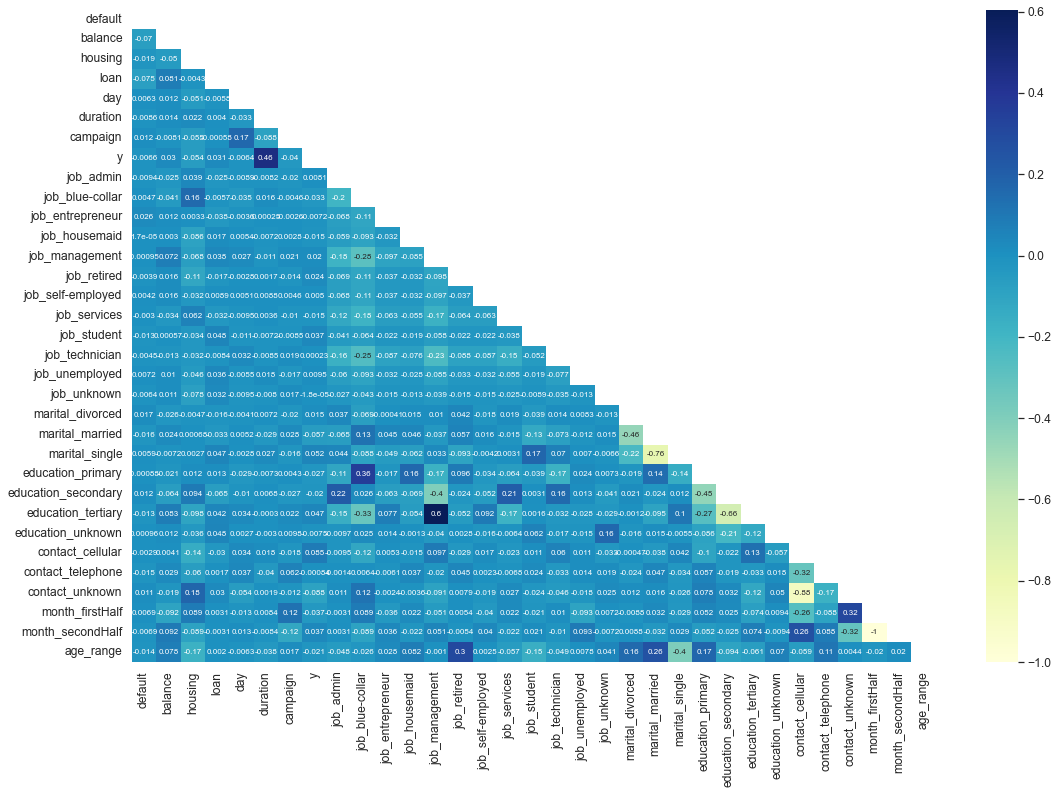

In [77]:
plt.figure(figsize = (18,12))
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.1) 
sns.set_style("white")
sns.heatmap(correlation, mask=mask, annot=True, cmap='YlGnBu', annot_kws={"size": 8})

<AxesSubplot:xlabel='y', ylabel='count'>

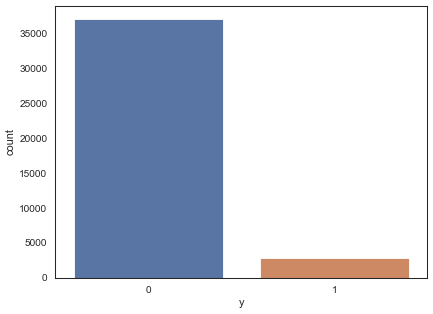

In [78]:
plt.figure(figsize=(8,6), dpi=60)
sns.countplot(data=df, x='y')

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Decision Tree

In [80]:
X = df.drop('y', axis=1)
y = df['y']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)



In [82]:
scaler = StandardScaler()

In [83]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [84]:
tree = DecisionTreeClassifier(max_depth=5, random_state=101)
tree.fit(scaled_X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=101)

In [85]:
tree_pred = tree.predict(scaled_X_test)
accuracy_score(y_test, tree_pred)

0.93275

In [86]:
f1_score(y_test, tree_pred)

0.42562277580071173

In [87]:
importances = tree.feature_importances_
importances

array([3.17299637e-04, 1.20987190e-02, 0.00000000e+00, 0.00000000e+00,
       2.41932970e-02, 8.56889770e-01, 2.08646675e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.47732599e-03, 3.29234061e-03,
       3.61755179e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.58159371e-02, 0.00000000e+00,
       2.59122664e-02, 0.00000000e+00, 1.37897682e-02, 3.05092573e-02])

In [88]:
best_feature_index = np.argmax(importances)
best_feature = df.columns[best_feature_index]
best_score = importances[best_feature_index]
print(best_feature, best_score)

duration 0.8568897702392919


## Random Forest

### GridSearchCV for Random Forest Model

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [90]:
n_stimators = [10, 20, 30 ,40]
max_depth = [2, 3, 5, 10]
param_grid = dict(n_estimators = n_stimators, max_depth = max_depth)

In [91]:
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf,
                   param_grid = param_grid,
                   cv = 3,
                   verbose = 2,
                   n_jobs = -1)


In [92]:
grid_rf = grid_search.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [93]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=10)

In [94]:
y_dt_pred = grid_search.predict(scaled_X_test)

In [95]:
f1_score(y_test, y_dt_pred)

0.2019047619047619

### Random Forest Classifier with optimized hyperparameters

In [96]:
rfc = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=101)

In [97]:
rfc.fit(scaled_X_train, y_train)
y_rfc_predic = rfc.predict(scaled_X_test)
print('Model accuracy score with 40 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_rfc_predic)))

Model accuracy score with 40 decision-trees : 0.9335


In [98]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

duration               0.631267
day                    0.062289
balance                0.057987
age_range              0.038707
campaign               0.032104
contact_unknown        0.017934
month_secondHalf       0.013645
contact_cellular       0.012951
housing                0.012522
month_firstHalf        0.011432
education_tertiary     0.008663
loan                   0.008588
marital_married        0.007885
marital_single         0.007705
marital_divorced       0.006865
education_secondary    0.006181
job_student            0.005309
education_primary      0.005216
job_management         0.005114
job_admin              0.005106
job_blue-collar        0.005048
contact_telephone      0.004966
job_technician         0.004421
job_retired            0.004314
job_self-employed      0.003856
job_services           0.003614
education_unknown      0.003542
job_housemaid          0.003115
job_unemployed         0.002911
default                0.002627
job_entrepreneur       0.002506
job_unkn

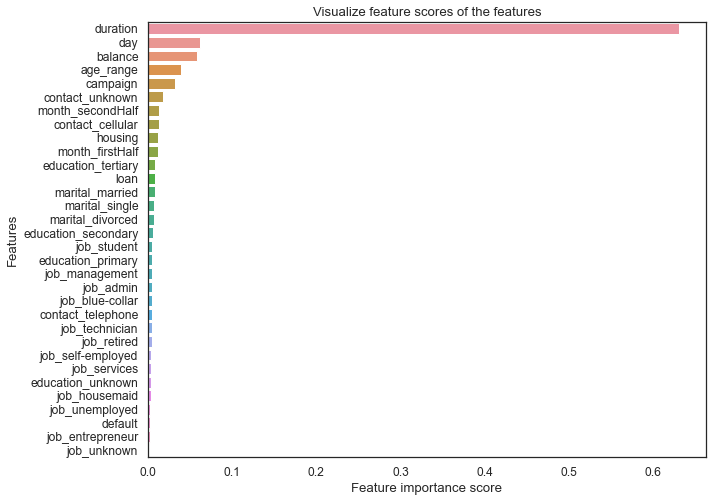

In [99]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [100]:
f1_rfc = f1_score(y_test, y_rfc_predic)
print("F1 score for Random Forest:", f1_rfc)

F1 score for Random Forest: 0.30122591943957966


In [101]:
selected_columns = ['balance', 'housing', 'loan', 'day', 'duration', 'campaign',
                   'y', 'job_blue-collar', 'contact_cellular','contact_unknown', 
                    'month_firstHalf', 'month_secondHalf', 'age_range'
                   ]

In [102]:
X2 = df[selected_columns]

In [103]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=101)

In [104]:
scaled_X2_train = scaler.fit_transform(X2_train)
scaled_X2_test = scaler.transform(X2_test)

In [105]:
X2_train.shape

(28000, 13)

## LogisticRegression

In [106]:
from sklearn.linear_model import LogisticRegression


In [107]:
log_model = LogisticRegression()
n_splits = 5 
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=101)


In [108]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
penalty = ['l1', 'l2']
C = np.logspace(-4, 4, 10)
grid_model_lgr = GridSearchCV(log_model,param_grid={'C':C, 'penalty':penalty}, cv = stratified_kfold, scoring='f1')

In [109]:
grid_model_lgr.fit(scaled_X_train,y_train)

C:\Users\alima\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alima\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alima\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alima\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [111]:
grid_model_lgr.best_params_

{'C': 0.3593813663804626, 'penalty': 'l2'}

In [112]:
# best_C = grid_model.best_params_['C']
# best_penalty = grid_model.best_params_['penalty']

# optimized_log_model = LogisticRegression(C=best_C, penalty=best_penalty)

In [113]:
# optimized_log_model.fit(scaled_X_train, y_train)

In [114]:
y_logreg_pred = grid_model_lgr.predict(scaled_X_test)

In [115]:
f1_score(y_test, y_logreg_pred)

0.34094616639477976

In [116]:
confusion_matrix(y_test, y_logreg_pred)

array([[10983,   148],
       [  660,   209]], dtype=int64)

C:\Users\alima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


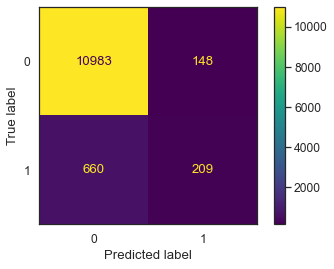

In [117]:
plot_confusion_matrix(grid_model_lgr, scaled_X_test, y_test)

In [118]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

C:\Users\alima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


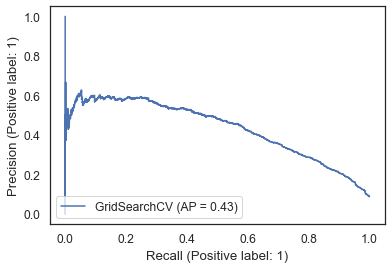

In [119]:
plot_precision_recall_curve(grid_model_lgr,scaled_X_test, y_test)

C:\Users\alima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


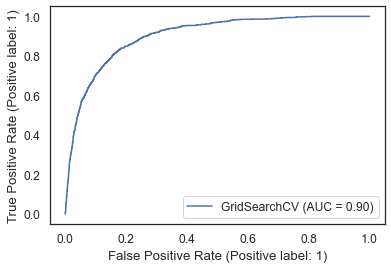

In [120]:
plot_roc_curve(grid_model_lgr,scaled_X_test,y_test)

## KNN model

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
# finding the best hyper parameters for knn model using GridsearchCV and StratifiedKfold together!
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7, 10, 20],'metric': ['euclidean', 'manhattan']}

In [123]:
n_splits = 5
knn_skfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=101)

In [124]:
knn_gridsearch_model = GridSearchCV(knn, knn_param_grid, cv=knn_skfold, scoring='f1')

In [125]:
knn_gridsearch_model.fit(scaled_X_train, y_train)
knn_gridsearch_model.best_params_


{'metric': 'euclidean', 'n_neighbors': 3}

### Applying the optimized hyperparameters for fitting the KNN model to the dataset!

In [126]:
# knn_model = KNeighborsClassifier(n_neighbors =3)
# knn_model.fit(scaled_X_train, y_train)
y_knn_pred = knn_gridsearch_model.predict(scaled_X_test)
f1_score(y_test, y_knn_pred)

0.2896979085979861

### Finding feature importance using KNN model and StratifiedKfold method

In [127]:
feature_names = X.columns.to_list()

In [128]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [129]:
Xs

array([[-0.14367496,  0.29917431,  0.81517892, ...,  0.47726803,
        -0.47726803,  1.52859703],
       [-0.14367496, -0.42885395,  0.81517892, ...,  0.47726803,
        -0.47726803,  0.50909056],
       [-0.14367496, -0.43815233,  0.81517892, ...,  0.47726803,
        -0.47726803, -0.51041592],
       ...,
       [-0.14367496, -0.36996425, -1.22672456, ...,  0.47726803,
        -0.47726803,  1.52859703],
       [-0.14367496, -0.0782708 , -1.22672456, ...,  0.47726803,
        -0.47726803, -0.51041592],
       [-0.14367496,  0.05776097,  0.81517892, ...,  0.47726803,
        -0.47726803, -0.51041592]])

In [130]:
Xs = pd.DataFrame(Xs, columns=feature_names)

## Over-Sampling, using the SMOTE technique

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [216]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler


In [316]:
# sampling_strategy_smote = {
#     1: 12000,
# }
smote = SMOTE(sampling_strategy= 0.4)

In [317]:
X_smt, y_smt = smote.fit_resample(X_train, y_train)

In [318]:
# desired_class_0_samples = int(1.0 * len(y_smote[y_smote == 0]))

# # RandomUnderSampler to achieve the desired ratio for class 0
# random_under = RandomUnderSampler(sampling_strategy={0: desired_class_0_samples})
# X_smt, y_smt = random_under.fit_resample(X_smote, y_smote)

In [354]:
X_smt.shape

(36362, 32)

In [319]:
# resampled_df = pd.DataFrame(X_smt, columns=X.columns)
# resampled_df['y'] = y_smt

resampled_df = pd.concat([X_smt, y_smt], axis =1)

<AxesSubplot:xlabel='y', ylabel='count'>

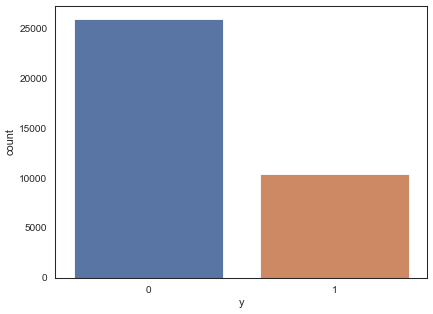

In [320]:
plt.figure(figsize=(8,6), dpi=60)
sns.countplot(data=resampled_df, x='y')

## Random Forest with resampled data

In [321]:
# Xsmt_train, Xsmt_test, ysmt_train, ysmt_test = train_test_split(X_smt, y_smt, test_size=0.3, stratify=y_smt, random_state=101)

In [322]:
# Xsmt_train.shape

In [323]:
scaler = StandardScaler()
scaled_Xsmt = scaler.fit_transform(X_smt)

In [324]:
n_stimators = [10, 20, 30 ,40]
max_depth = [2, 3, 5, 10]
param_grid = dict(n_estimators = n_stimators, max_depth = max_depth)

In [325]:
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf,
                   param_grid = param_grid,
                   cv = 3,
                   verbose = 2,
                   n_jobs = -1)


In [326]:
grid_rfc = grid_search.fit(scaled_Xsmt, y_smt)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [327]:
best_rfc_classifier = grid_rfc.best_estimator_

In [328]:
y_rfc_predic = best_rfc_classifier.predict(scaled_X_test)
print(f1_score(y_rfc_predic, y_test))
# print('Model accuracy score with 30 decision-trees : {0:0.4f}'. format(accuracy_scor(y_test, y_rfc_predic)))

0.43609806990088684


In [329]:
resampled_feature_scores = pd.Series(best_rfc_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

resampled_feature_scores

duration               0.410949
age_range              0.056838
contact_unknown        0.053980
marital_married        0.047319
month_secondHalf       0.045187
month_firstHalf        0.044323
marital_single         0.041872
housing                0.041677
education_secondary    0.036843
education_primary      0.022388
job_blue-collar        0.021655
education_tertiary     0.019072
day                    0.018981
contact_cellular       0.017552
marital_divorced       0.017425
job_management         0.015816
balance                0.015080
job_technician         0.014427
contact_telephone      0.012366
campaign               0.010605
job_services           0.008297
education_unknown      0.007988
job_admin              0.007245
loan                   0.002360
job_unemployed         0.002035
job_entrepreneur       0.001821
job_self-employed      0.001776
job_housemaid          0.001440
job_retired            0.001373
default                0.000621
job_student            0.000528
job_unkn

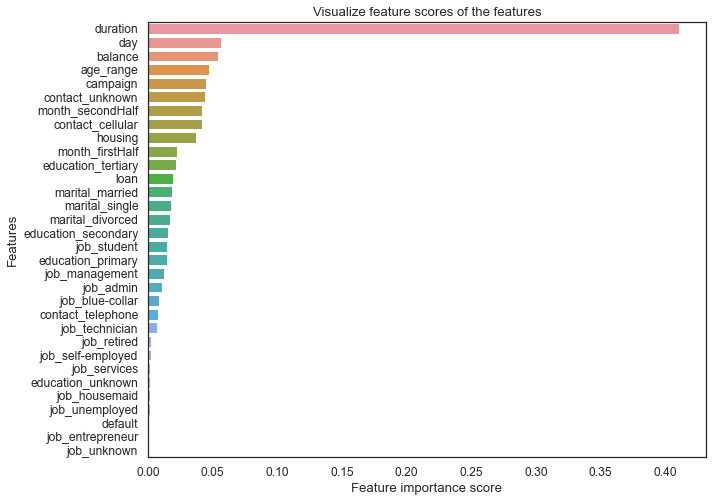

In [330]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=resampled_feature_scores, y=resampled_feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [331]:
resampled_important_features = []
for idx, scor in enumerate(resampled_feature_scores):
    if scor > 0.01:
        resampled_important_features.append(resampled_feature_scores.index[idx])
print(resampled_important_features)

['duration', 'age_range', 'contact_unknown', 'marital_married', 'month_secondHalf', 'month_firstHalf', 'marital_single', 'housing', 'education_secondary', 'education_primary', 'job_blue-collar', 'education_tertiary', 'day', 'contact_cellular', 'marital_divorced', 'job_management', 'balance', 'job_technician', 'contact_telephone', 'campaign']


## Logistic Regression using Resampled Data

In [335]:
X2_selected = X_smt[resampled_important_features]

In [384]:
X2_test_important_features = X_test[resampled_important_features]

In [385]:
scaler = StandardScaler()
scaled_X2_selected = scaler.fit_transform(X2_selected)
scaled_X2_test_important_features = scaler.transform(X2_test_important_features)

In [180]:
# scaled_X2_train = scaler.fit_transform(X2_train)
# scaled_X2_test = scaler.transform(X2_test)

In [386]:
log_model_resampled = LogisticRegression()

In [387]:
scaled_X2_selected.shape

(36362, 20)

In [388]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
penalty = ['l1', 'l2']
C = np.logspace(-4, 4, 10)
grid_model_lgr_resampled = GridSearchCV(log_model_resampled,param_grid={'C':C, 'penalty':penalty}, cv = stratified_kfold, scoring='accuracy')

In [389]:
grid_model_lgr_resampled.fit(scaled_X2_selected, y_smt)

C:\Users\alima\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alima\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alima\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alima\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [390]:
best_grid_model_lgr = grid_model_lgr_resampled.best_estimator_

In [391]:
y_predicted_lgr = best_grid_model_lgr.predict(scaled_X2_test_important_features)

In [402]:
f1_score(y_test, y_predicted_lgr)

0.39827462257368806

In [399]:
accuracy_score(y_test, y_predicted_lgr)

0.93025

In [400]:
confusion_matrix(y_test, y_predicted_lgr)

array([[10886,   245],
       [  592,   277]], dtype=int64)

C:\Users\alima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


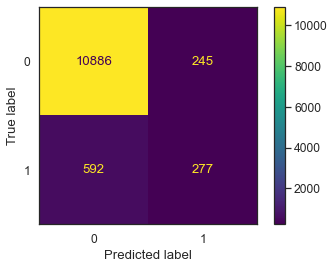

In [405]:
plot_confusion_matrix(best_grid_model_lgr, scaled_X2_test_important_features, y_test)

C:\Users\alima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


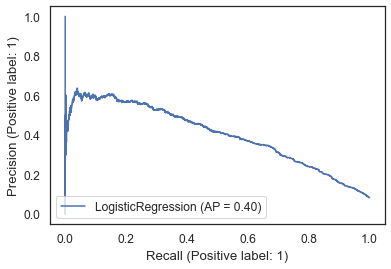

In [407]:
plot_precision_recall_curve(best_grid_model_lgr, scaled_X2_test_important_features, y_test)

C:\Users\alima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


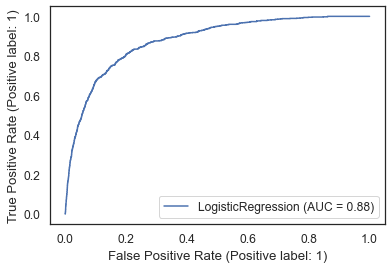

In [408]:
plot_roc_curve(best_grid_model_lgr, scaled_X2_test_important_features, y_test)

## KNN Classification Model using Resampled Data

In [409]:
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7, 10, 20],'metric': ['euclidean', 'manhattan']}
n_splits = 5
knn_skfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=101)

In [418]:
knn_gridsearch_resampled = GridSearchCV(knn, knn_param_grid, cv=knn_skfold, scoring='accuracy')

In [421]:
knn_gridsearch_resampled.fit(scaled_X2_selected, y_smt)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 10, 20]},
             scoring='accuracy')

In [433]:
best_knn_grid_model = knn_gridsearch_resampled.best_estimator_

In [434]:
ysmt_knn_predicted = best_knn_grid_model.predict(scaled_X2_test_important_features)


In [435]:
accuracy_score(y_test, ysmt_knn_predicted)

0.9195

### with F1 scoring!

In [437]:
knn_f1_gridsearch_resampled = GridSearchCV(knn, knn_param_grid, cv=knn_skfold, scoring='f1')

In [438]:
knn_f1_gridsearch_resampled.fit(scaled_X2_test_important_features, y_test)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 10, 20]},
             scoring='f1')

In [439]:
bestf1_knn_grid_model = knn_f1_gridsearch_resampled.best_estimator_

In [440]:
ysmt_knn_predicted = bestf1_knn_grid_model.predict(scaled_X2_test_important_features)
f1_score(y_test, ysmt_knn_predicted)

0.5509893455098934

## SHAP & LIME Model Explanations

### SHAP Model Explanation for Random Forest Model with Resampled Dataset!

In [442]:
import shap
import numpy as np

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [459]:
explainer = shap.TreeExplainer(grid_rf.best_estimator_)


In [460]:
# mapping the feature names that are lost after scaling the X_traina dnX_test! 
original_feature_names = X_train.columns

In [461]:
scaled_df_train = pd.DataFrame(scaled_X_train, columns=original_feature_names)
scaled_df_test = pd.DataFrame(scaled_X_test, columns=original_feature_names)

In [462]:
scaled_df_test.shape

(12000, 32)

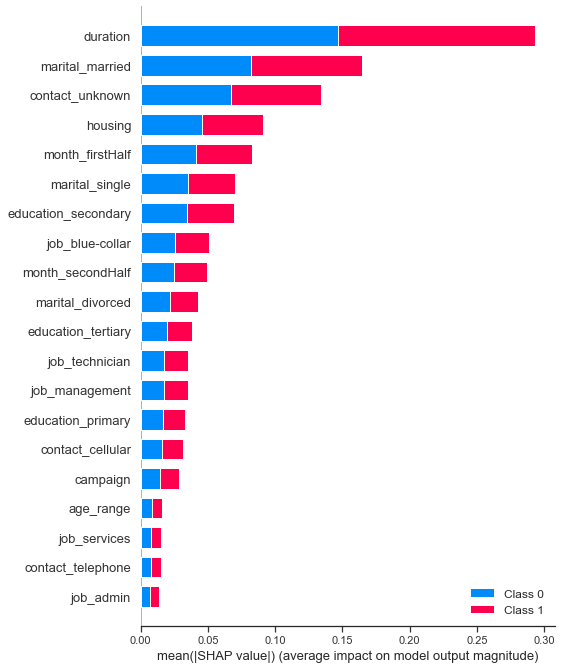

In [463]:
shap_values = explainer.shap_values(scaled_df_train)
shap_values_test = explainer.shap_values(scaled_df_test)
# Plot summary plot for featur importances
shap.summary_plot(shap_values, scaled_df_train)

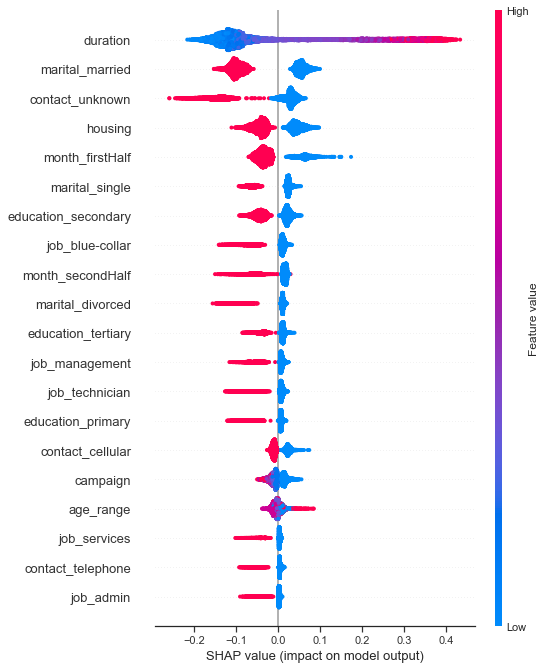

In [464]:
shap.summary_plot(shap_values_test[1], scaled_df_test)



# Outcomes:

### The model predicts if customers subscribe for the service with 93% accuracy!
### Duration of the calss is the most importatnt parameter for convincieng customers to subscribe for the service. In other words, it really depends on how much time the operators talk to customers to convience them to use the service!